In [2]:
%config IPCompleter.greedy=True
%matplotlib inline


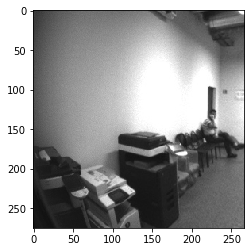

In [110]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def eulerAnglesToRotationMatrix(theta):
    theta = theta*np.pi/180
     
    R_x = np.array([[1,         0,                  0                   ],
                    [0,         math.cos(theta[0]), -math.sin(theta[0]) ],
                    [0,         math.sin(theta[0]), math.cos(theta[0])  ]
                    ])
         
         
                     
    R_y = np.array([[math.cos(theta[1]),    0,      math.sin(theta[1])  ],
                    [0,                     1,      0                   ],
                    [-math.sin(theta[1]),   0,      math.cos(theta[1])  ]
                    ])
                 
    R_z = np.array([[math.cos(theta[2]),    -math.sin(theta[2]),    0],
                    [math.sin(theta[2]),    math.cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])
                     
                     
    R = np.dot(R_z, np.dot( R_y, R_x ))
 
    return R

def getRotatedImage(hor = 0.0, vert = 0.0):
    """homography camera rotation for the test example

    Keyword arguments:
    hor -- horizontal rotation angle in degrees (default 0.0)
    vert -- vertical rotation angle in degrees (default 0.0)


    """
    image = cv2.imread(r'C:\Users\pervo\Documents\repos\dioramTest\1.jpeg')
    K = np.array([283.3204, 0, 425.59799,0, 284.35281, 403.94809, 0, 0, 1]).reshape(3,3)
    D = np.array([-0.001933632, 0.03497972, -0.032952748, 0.0049995692, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    R = eulerAnglesToRotationMatrix(np.array([-vert, -hor, 0]))
    newK = K
    h,  w = image.shape[:2]

    mapx,mapy = cv2.initUndistortRectifyMap(K,D,R,newK,(int(newK[0,2]*2),int(newK[1,2]*2)), 5)
    dst = cv2.remap(image,mapx,mapy,cv2.INTER_CUBIC)

    h1= h/6
    w1= w/6
    dst = dst[int(w/2-w1):int(w/2+h1), int(h/2-h1):int(h/2+h1)]
    return dst

if __name__ == '__main__':
    rotImage = getRotatedImage(-20,-5)    
    plt.imshow(rotImage)
    plt.show()